In [46]:
#IMPORTING LIBRARIES
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math
from math import log
from random import randrange, getrandbits
import random
import time

In [47]:
#ARNOLD CAT MAPPING IMPLEMENTATION
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]
    return img_arnold

def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite("ArnoldcatEnc.png", img)
    return img

def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite("ArnoldcatDec.png",img)
    return img

In [48]:
#VERIFYING THE OUTPUT SAME OR DIFFERENT
def same(img1,img2):
  a = cv2.imread(img1)
  b = cv2.imread(img2)
  if(a.shape!=b.shape):
    return "Image sizes are different"
  else:
    difference = cv2.subtract(a, b)
    result = not np.any(difference)
    if result is True:
        return "Pictures are the same"
    else:
        return "Pictures are different"

In [49]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    if err == 0:
        print("The images are identical.")
    else:
        print("The images are different.")

In [50]:
#RSA CODE IMPLEMENTATION
def is_prime(number):
    if number <= 1:
        return False
    else:
        for i in range(2, int(math.sqrt(number)) + 1):
            if number % i == 0:
                return False
        return True

def generate_primes():
    while True:
        prime1 = random.randint(100, 1000)
        prime2 = random.randint(100, 1000)
        if is_prime(prime1) and is_prime(prime2) and prime1 != prime2:
            return prime1, prime2

def generate_E(m):
    coprime_number = 2
    while math.gcd(m, coprime_number) != 1:
        coprime_number = random.randint(2, m - 1)
    return coprime_number

def generate_D(M, E):
    k = 1
    while True:
        d = (((M * k) + 1) / E)
        if d == int(d):
            return int(d)
        k += 1

def generate_key_pair():
    p, q = generate_primes()
    n = p * q
    m = (p - 1) * (q - 1)
    e = generate_E(m)
    d = generate_D(m, e)
    return p, q, n, m, e, d

def encrypt_image(flat_image, E, modulus):
    encrypted_text = [pow(int(flat_image[i]), E, modulus) for i in range(len(flat_image))]
    return np.array(encrypted_text)

def decrypt_image(encrypted_image, D, modulus):
    decrypted_text = [pow(int(encrypted_image[i]), D, modulus) for i in range(len(encrypted_image))]
    return np.array(decrypted_text)

def reshape_image(flattened_image, height, width):
    return flattened_image.reshape(height, width, 3)

def RSA(img):
    height, width = img.shape[:2]

    p, q, n, m, E, D = generate_key_pair()
    flat_array_of_original_image = img.flatten()

    encrypted_image_text = encrypt_image(flat_array_of_original_image, E, n)
    encrypted_image_img = reshape_image(encrypted_image_text, height, width)

    decrypted_image_text = decrypt_image(encrypted_image_text, D, n)
    decrypted_image_img = reshape_image(decrypted_image_text, height, width)

    print("RSA Encrypted Image")
    cv2.imwrite("encrypted_image.png", encrypted_image_img)
    cv2_imshow(cv2.imread("encrypted_image.png"))

    print("RSA Decrypted Image")
    cv2.imwrite("decrypted_image.png", decrypted_image_img)
    cv2_imshow(cv2.imread("decrypted_image.png"))

In [51]:
def rgb(img1):
  img=cv2.imread(img1)
  print("Image: ",img1)
  rows,col,size=img.shape
  for j in range(rows):
    for k in range(col):
      print(img[j,k],end= " ")
    print("\n")

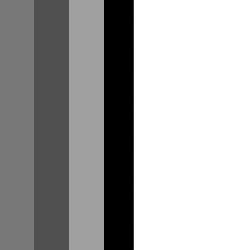

In [52]:
#CALLING FUNCTION AND PROCESSING IMAGE FOR CONFUSION AND DIFFUSION OF RSA
image = "rgbbw1"
ext = ".png"
if(ext==".jpg"):
  img=cv2.imread(image+ext)
  cv2.imwrite(image+".png",img)
key = 15
ext=".png"
img=cv2.imread(image+ext)
img=cv2.resize(img,(250,250))
cv2.imwrite("small.png",img)
cv2_imshow(cv2.imread("small.png"))
image="small"

Arnold Cat Encrypted Image


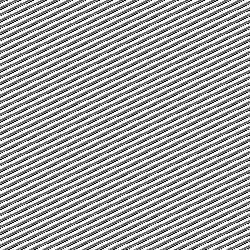

RSA Encrypted Image


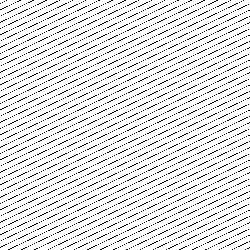

RSA Decrypted Image


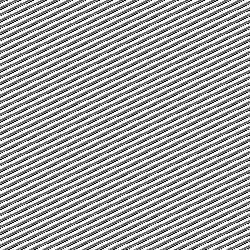

Arnold Cat Decrypted Image


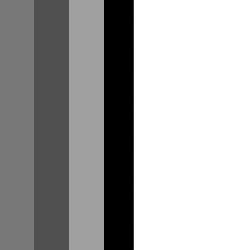

In [53]:
#CALLING FUNCTION AND PROCESSING THE ENCYRPTION AND DECRYPTION OF ARNOLDCAT
ArnoldCatEncryptionIm = ArnoldCatEncryption(image +ext, key)
print("Arnold Cat Encrypted Image")
cv2_imshow(ArnoldCatEncryptionIm)
RSA(ArnoldCatEncryptionIm)
ArnoldCatDecryptionIm = ArnoldCatDecryption("decrypted_image.png", key)
print("Arnold Cat Decrypted Image")
cv2_imshow(ArnoldCatDecryptionIm)

In [54]:
#PRINTING THE VERIFICATION
print(same("rgbbw1.png","encrypted_image.png"))
print(same("small.png","encrypted_image.png"))
print(same("small.png","ArnoldcatDec.png"))

Image sizes are different
Pictures are different
Pictures are the same


In [55]:
rgb("ArnoldcatDec.png")

Image:  ArnoldcatDec.png
[120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [120 120 120] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [80 80 80] [160 160 160] [160 160 160] [160 160 160] [160 160 160] [160 160 160] [160 160 160] [160 160 160] [160 160 160] [1

In [56]:
rgb("ArnoldcatEnc.png")

Image:  ArnoldcatEnc.png
[120 120 120] [120 120 120] [80 80 80] [80 80 80] [160 160 160] [160 160 160] [0 0 0] [57 57 57] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [120 120 120] [80 80 80] [80 80 80] [160 160 160] [160 160 160] [0 0 0] [0 0 0] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [120 120 120] [120 120 120] [80 80 80] [160 160 160] [160 160 160] [0 0 0] [0 0 0] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [120 120 120] [120 120 120] [80 80 80] [80 80 80] [160 160 160] [0 0 0] [0 0 0] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [120 120 120] [120 120 120] [80 80 80] [80 80 80] [160 160 160] [160 160 160] [0 0 0] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [120 120 120] [120 120 120] [80 80 80] [80 80 80] [160 160 160] [160 160 160] [0 0 0] [255 255 255] [255 255 255] [255 255 255] [

In [57]:
rgb("encrypted_image.png")

Image:  encrypted_image.png
[255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [0 0 0] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [0 0 0] [0 0 0] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [0 0 0] [0 0 0] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [0 0 0] [0 0 0] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [0 0 0] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [255 255 255] [0 0 0] [255